 # SIMPLE ALGORITHMIC TRADING STRATEGY WITH PYTHON
 
Trading stocks is usually a sophisticated process that needs a lot of research and a trading strategy. Successfull traders have trading strategies they use to profit from their trades. Such strategies may be fundamental which relies on data about market share, financial records, economic reports and asserts of the company whose stock you want to trade and profit from. An alternative strategy which we are going to be focused on is technical trading which relies on data about past and present price action of the stock you want to trade.In this notebook were going to use a simple algorithm to make a decision on whether to buy or sell a stock. We are going to be using TESLA Inc. (TSLA) stock to demonstrate this algorithm but this can be done for any stock or security.

Disclaimer: This is not financial advice as we are not experts in stock trading or finance. We are not liable for any losses incured from taking this as financial advice.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np


 We are going to read the TSLA historic data downloaded from yahoo finance and preview the data.

In [10]:
TSLA = pd.read_csv('TSLA.csv')
TSLA.set_index('Date', inplace = True)
TSLA.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000


We are going to calculate Simple Moving Avarages. Simple Moving Averages are smoother than the Close price therefore we can easily see the peaks and troughs of the curves. This enables traders or analysts to easily spot the price action of the stock over a period of time. We use Adjusted Close price to track the stock share price because it has been modified to account for stock splits. SMA1 represents a fast signal and SMA2 represents a slower signal. 

In [11]:
SMA1 = 30
SMA2 = 200
TSLA['SMA1'] = TSLA['Adj Close'].rolling(30).mean()
TSLA['SMA2'] = TSLA['Adj Close'].rolling(200).mean()

TSLA = TSLA.iloc[SMA2:]
TSLA.head(3)


,Open,High,Low,Close,Adj Close,Volume,SMA1,SMA2
Date,,,,,,,,
2020-10-16,151.479996,151.983337,146.283340,146.556671,146.556671,98327700,139.787887,76.24211
2020-10-19,148.746674,149.000000,142.956665,143.610001,143.610001,108863400,139.926887,76.81249
2020-10-20,143.916672,143.916672,139.683334,140.646667,140.646667,94968900,140.946110,77.36521


Now we plot our graphs with the Adj Close price being the Share price and SMA1 for a fast signal and SMA2 for slow signal

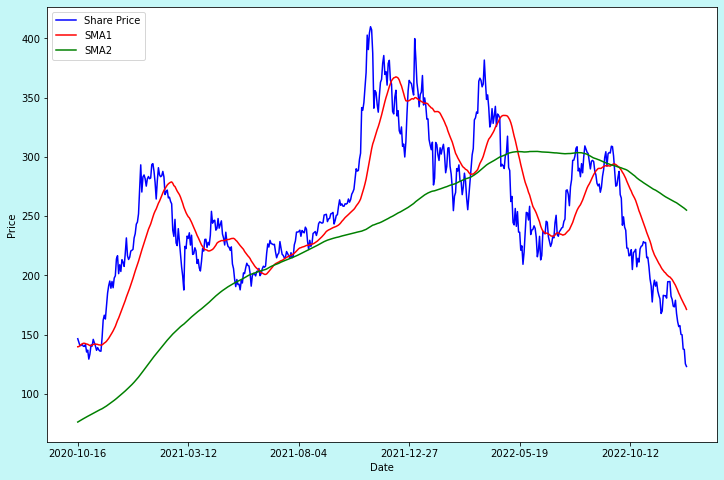

In [12]:
plt.figure(figsize = (12,8), facecolor = '#C5F7F7')
TSLA['Adj Close'].plot(label = 'Share Price', color = 'blue')
TSLA['SMA1'].plot(label = 'SMA1', color = 'red')
TSLA['SMA2'].plot(label = 'SMA2', color = 'green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc = 'upper left')
plt.show()

We focus on the two moving averages SMA1 and SMA2 to determine when to buy a share of the stock and when to sell. With the strategy we establish that we buy and hold a share of the stock when SMA1 > SMA2, i.e we long the stock.When SMA1 > SMA2, this is an indicator that the stock price will increase  that is why we want to buy and hold. From that we can also determine our daily profit and cummulative profit in that period.

In [13]:
# We buy a share of the stock when SMA1 > SMA2 otherwise we do not do anything.
TSLA['Shares'] = [1 if TSLA.loc[i, 'SMA1'] > TSLA.loc[i, 'SMA2'] else 0 for i in TSLA.index ]

# We can also calculate daily profit as Close price of tomorrow - Close price of today.That 
# is we calculate the difference to see if the price went up or down.
TSLA['CloseTmr'] = TSLA['Close'].shift(-1)
TSLA['Profit'] = [TSLA.loc[i, 'CloseTmr'] - TSLA.loc[i, 'Close'] if TSLA.loc[i, 'Shares'] == 1 else 0 for i in TSLA.index]

# Now we determine the cummulative profit
TSLA['CummProfit'] = TSLA['Profit'].cumsum()
TSLA.tail()



,Open,High,Low,Close,Adj Close,Volume,SMA1,SMA2,Shares,CloseTmr,Profit,CummProfit
Date,,,,,,,,,,,,
2022-12-19,154.000000,155.250000,145.820007,149.869995,149.869995,139390600,179.076666,258.021717,0,137.800003,0.0,42.613313
2022-12-20,146.050003,148.470001,137.660004,137.800003,137.800003,159563300,177.100666,257.369751,0,137.570007,0.0,42.613313
2022-12-21,139.339996,141.259995,135.889999,137.570007,137.570007,145417400,175.309666,256.683601,0,125.349998,0.0,42.613313
2022-12-22,136.000000,136.630005,122.260002,125.349998,125.349998,210090300,173.568333,255.878734,0,123.150002,0.0,42.613313
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166396100,171.316000,255.097317,0,NaN,0.0,42.613313


We can visualize the cummulative profit generated by this trading strategy to see how the profits were growing.

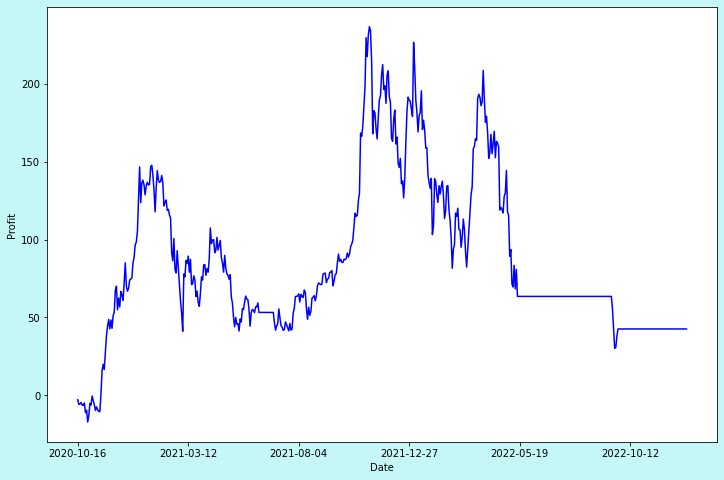

In [14]:
plt.figure(figsize = (12,8), facecolor = '#C5F7F7')
TSLA['CummProfit'].plot(label = 'Cummulative Profit', color = 'blue')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.show()

In [15]:
print(TSLA['CummProfit'].describe())
print(TSLA['Close'][0])
TSLA['CummProfit'][-2]


count    552.000000
mean      86.729998
std       50.885872
min      -17.210007
25%       53.229996
50%       65.651665
75%      118.899170
max      236.899994
Name: CummProfit, dtype: float64
146.556671


42.613313000000005

## Summary
The above graph coupled with the descriptive statistics summary gives us very important information about trades made using the strategy. Having bought 1 share for 146.556671 at the beginning we can see that the maximum cummulative profit that could be made is 236.899994 compared to the 42.613313 made if we held the stock until 2022-10-12.The biggest cummulative loss is 17.210007
This is not the most profitable trading strategy, there are much better and more sophisticated trading strategies that use different signals to track the price action of a stock.However the perfomance of this stategy can be tested using a backtesting method